<a href="https://colab.research.google.com/github/SIVARAM7744/Shadowfox-/blob/main/SF_beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ShadowFox beginner project - Image predictor**

In [1]:
import tensorflow as tf


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))
model.save('/content/drive/MyDrive/Shadowfox/animclass.h5')


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.5277 - loss: 1.3216 - val_accuracy: 0.5963 - val_loss: 1.1467
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.6188 - loss: 1.0803 - val_accuracy: 0.6340 - val_loss: 1.0306
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6637 - loss: 0.9571 - val_accuracy: 0.6703 - val_loss: 0.9501
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.6909 - loss: 0.8782 - val_accuracy: 0.6877 - val_loss: 0.8960
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7218 - loss: 0.7994 - val_accuracy: 0.6915 - val_loss: 0.8884
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.7337 - loss: 0.7549 - val_accuracy: 0.7006 - val_loss: 0.8675
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7508 - loss: 0.7042 - val_accuracy: 0.7063 - val_loss: 0.8545
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.7723 -

In [9]:
import tensorflow as tf
import matplotlib.pyplot as pllt
from PIL import Image
import numpy as np
from google.colab import drive

In [16]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
def processimg(imgroute):
    image = Image.open(imgroute).convert('RGB').resize((32, 32))
    imgarr = np.array(image)
    imgarr = imgarr.astype('float32') / 255.0
    imgarr = np.expand_dims(imgarr, axis=0)
    return imgarr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predictions: [[8.2540355e-04 2.0692583e-05 1.1404260e-02 2.1105374e-01 1.2790320e-05
  9.5969401e-03 3.0358270e-04 7.5150597e-01 1.3796747e-02 1.4798270e-03]]


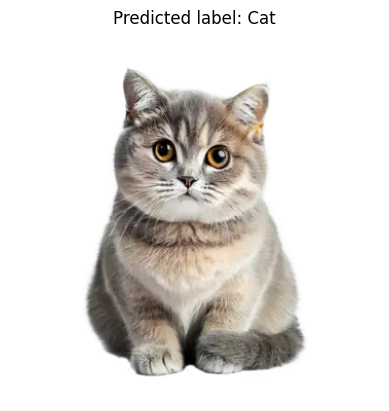

In [19]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Shadowfox/animclass.h5')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

imgroute = '/content/drive/MyDrive/Shadowfox/1.png'
next = processimg(imgroute)

predictions = model.predict(next)
print("Predictions:", predictions)

if predictions.size > 0:
    pred_index = np.argmax(predictions, axis=1)
    classesss = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'Cat', 'ship', 'truck']
    found = classesss[pred_index[0]]

    image = Image.open(imgroute)
    pllt.imshow(image)
    pllt.title(f'Predicted label: {found}')
    pllt.axis('off')
    pllt.show()
else:
    print("No valid predictions were made. Check the input image and model.")